In [1]:
import pandas as pd
import ast
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import spacy
# import wordcloud
# import en_core_web_sm
# nlp = spacy.load('en_core_web_sm')
# from collections import Counter

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import os
abspath = os.path.abspath('D:/Box Sync/editorials/scripts/')
os.chdir(abspath)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.width', 150)

print("done")

done


In [2]:
import import_func as imp
import desc_vis as vis
import tags_work as tgs
# import D:/Box Sync/editorials/scripts/import_func as imp
# import D:/Box Sync/editorials/scripts/desc_vis as vis

# Data
elist = "../data/editorials-1.jl"
tags = "../data/by_article_110219.jl"

print("done")

done


Import and process the data from .jl files using import_func functions

In [9]:
elist = "../data/editorials-1.jl"
tags = "../data/by_article_110219.jl"

editorial = imp.import_jl(elist)
tags = imp.import_jl(tags)

edi_df = imp.process(editorial, "editorial", "df")
edi_dict = imp.process(editorial, "editorial", "dict")

tag_df = imp.process(tags, "tags", "df")
tag_dict = imp.process(tags, "tags", "dict")

#edi_df.tail()

Clean the dataframes
* make a sequential date column for both dates and months
* indicate whether posts are columns or not (because early posts do not have a column tag, posts by authors that appear more than [5] times will be considered columns

In [10]:
edi_df = imp.seq_dates(edi_df, "editorial")
tags_df = imp.seq_dates(tag_df, "tags")

# tags_df = imp.id_columns(tag_df)

# tags_df = tgs.seperate_tags(tags_df)

len(tags_df)


6136

## Tags work ##

In [16]:
tags_df = imp.init_df("../data/by_article_110219.jl", focus="tags")


inc_dict = tgs.tag_incidence(tags_df, lifespan = True, id_col_tag = True, binary = True, dict_return=True)

#print(inc_dict["working life"]["overall"])

# col_tag_todf = {}

# for i in tags_df.index.values:
#     w_tag = tags_df.loc[i, "tag"]
#     col_tag_todf[w_tag] = inc_dict[w_tag]["overall"]["col_tag"]

# tags_df["col_tag"] = tags_df["tag"].map(col_tag_todf) 

#tags_df.tail()

In [21]:
# tags incidence dataframe
tag_inc_df = {"year":[],"tag":[],"incidence":[]}
tag_inc_counting = {}
# tag_inc_counting = {tag: {year:int, year: int, year: int}}

# count incidences of each tag per year
for key in [key for key in inc_dict.keys()]:
    # print(key)
    if inc_dict[key]["overall"]["col_tag"] == "no": # filter out tags that are probs identifying columns
        if key in tag_inc_counting.keys():
            for post in inc_dict[key]["overall"]["span"]:
                w_year = imp.cumul_to(post[1], "m")
                if w_year in tag_inc_counting[key].keys():
                    tag_inc_counting[key][w_year] += 1
        else:
            tag_inc_counting[key] = {}
            for post in inc_dict[key]["overall"]["span"]:
                tag_inc_counting[key][imp.cumul_to(post[1], "m")] = 1

# convert counting dictionary to dictionary that can be made into a df
for key in tag_inc_counting.keys():
    for year in tag_inc_counting[key].keys():
        tag_inc_df["year"].append(year)
        tag_inc_df["tag"].append(key)
        tag_inc_df["incidence"].append(tag_inc_counting[key][year])

tag_inc_df = pd.DataFrame(tag_inc_df)
tag_inc_df.tail()

,year,tag,incidence
996,2016,structural biology,1
997,2016,toxicology,1
998,2016,veterinary medicine,1
999,2016,virology,1
1000,2016,biophysics,1


Descriptive for tags
* how many tags total
* average number of tags per post


In [7]:
# total tags
print(len(inc_dict))

# average tags per post
print(np.average(tags_df.groupby(by = "headline").size()))


409
3.7708503345846256


# Publication Rates

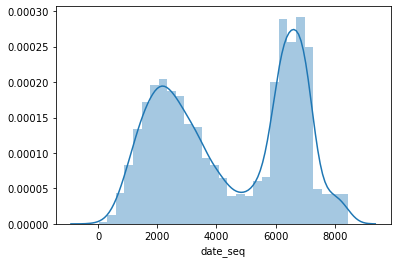

In [8]:
# Density of all posts by Sequential date
sns.distplot(tags_df["date_seq"])

In [9]:
# Posts each month

tag_plot_df = vis.prep_per_month(tags_df)

sns.lineplot(x = "month_seq", y = "n", color = "red", data = tag_plot_df)


NameError: name 'cumulative_months' is not defined